In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

PROJECT TITLE
Insurance Cost Prediction using Machine Learning


####INTRODUCTION
This project predicts medical insurance expenses based on features like age, BMI, gender, smoking habits, number of children
 and region.
 The goal is to understand which factors affect the cost and build a machine learning model to estimate expenses.


In [ ]:
df = pd.read_csv('/content/insurance (2).csv')

DATA DESCRIPTION
The dataset contains details of individuals and their medical insurance charges.

Columns:
- age: Age of the person
- sex: Male/Female
- bmi: Body Mass Index
- children: Number of dependents
- smoker: Smoking habit
- region: Geographic region
- expenses: Total medical cost


THEN SHOW
df.head()
df.info()
df.describe()


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
#EDA
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:
numeric_columns =["age","bmi","children","expenses"]

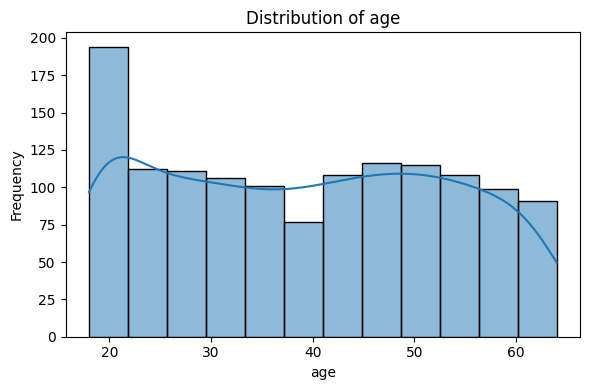

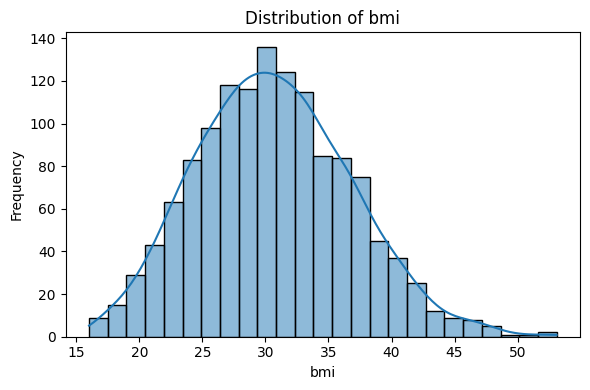

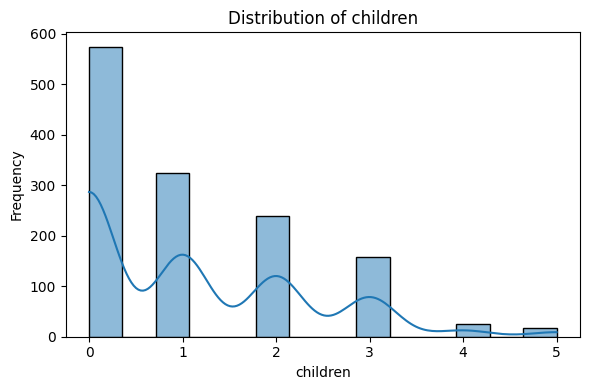

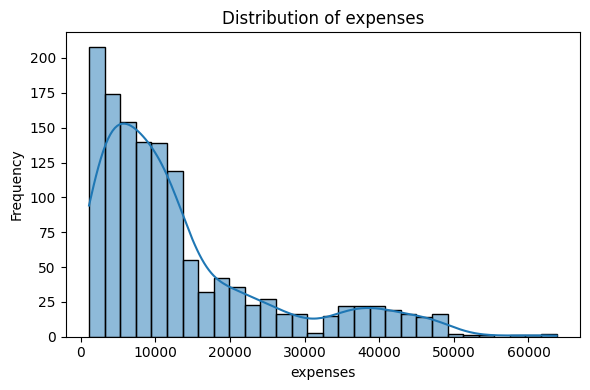

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

###📊 Distribution of Numerical Features
To understand how the numeric values are spread in the dataset, I plotted the distribution (histogram) of each numerical column.
This helps to identify:
Whether the data is normally distributed or skewed
If there are outliers
The range of values
How frequently certain values appear
The code generates a histogram for each numerical column using seaborn.histplot().
🧮 Distribution of Age
The plot shows how the age of individuals is spread across the dataset.
Key observations might include:
Most of the records fall within a certain age range
There may be fewer very young or very old individuals
The shape of the distribution helps to understand which age group is more common
Understanding age distribution is important because age directly affects insurance expenses — older individuals typically have higher medical costs.**bold text**

<Axes: xlabel='children', ylabel='count'>

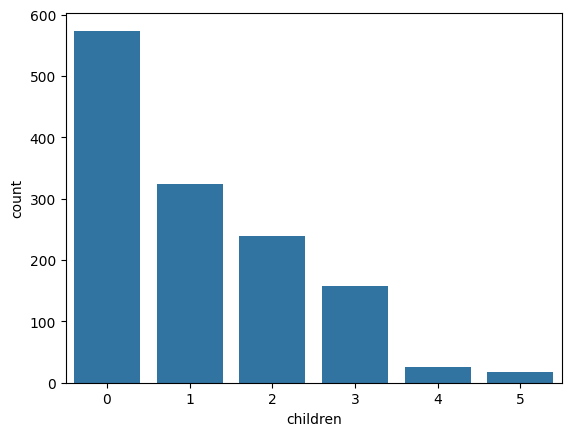

In [ ]:
sns.countplot(x=df["children"])

### Distribution of Children
This bar plot shows how many children each person in the dataset has.
It helps us understand the family size pattern in the insurance dataset.
### Key Observations
The majority of people have 0 children — this is the tallest bar.
The count gradually decreases as the number of children increases.
Very few people have 4 or 5 children, which makes those categories rare.
This information is useful because the number of children may influence insurance expenses — larger families may have higher medical costs.

In [ ]:
#df["age"]


<Axes: xlabel='children', ylabel='count'>

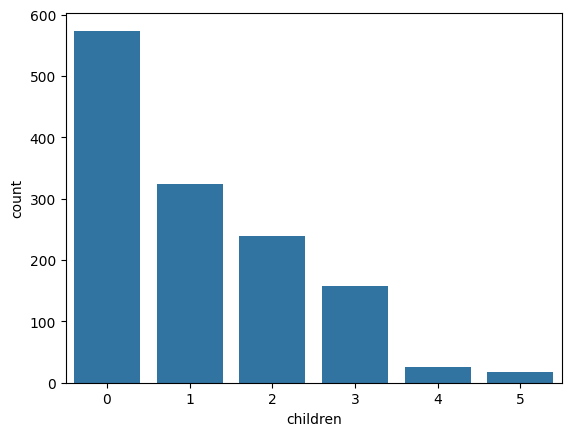

In [ ]:
sns.countplot(x=df["children"])

<Axes: xlabel='sex', ylabel='count'>

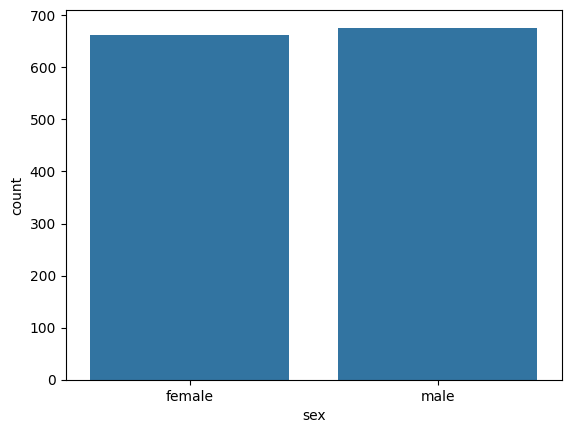

In [ ]:
sns.countplot(x=df["sex"])

######Gender Distribution Analysis
The bar chart shows the distribution of individuals by gender in the insurance dataset.
Both male and female categories have almost equal counts, with only a slight difference.
This indicates that the dataset is balanced in terms of gender, which is helpful because it reduces bias when training the machine learning model.
A balanced gender distribution means that gender-related patterns in medical expenses can be analyzed more reliably.

*   List item
*   List item



<Axes: xlabel='smoker', ylabel='count'>

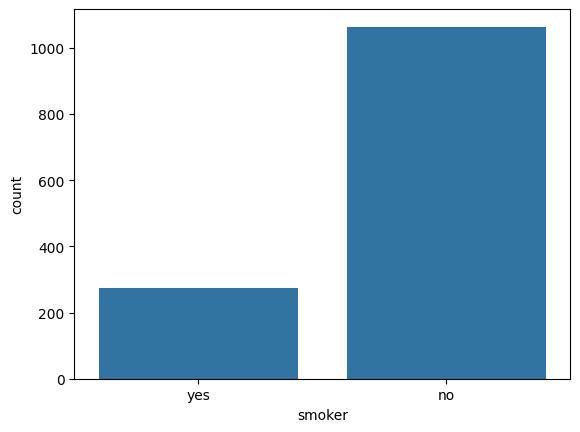

In [ ]:
sns.countplot(x=df["smoker"])


###Smoker Distribution Analysis
The bar chart shows the number of smokers and non-smokers in the insurance dataset.
There are significantly more non-smokers than smokers.
Only a small portion of individuals are smokers.
This imbalance is important because smoking has a strong impact on medical expenses.
Since smokers are fewer, the model must be trained carefully to avoid bias toward non-smokers.
Overall, the dataset indicates that most people in the sample population do not smoke, but those who do are likely to have higher insurance charges, which will be reflected later in the analysis.


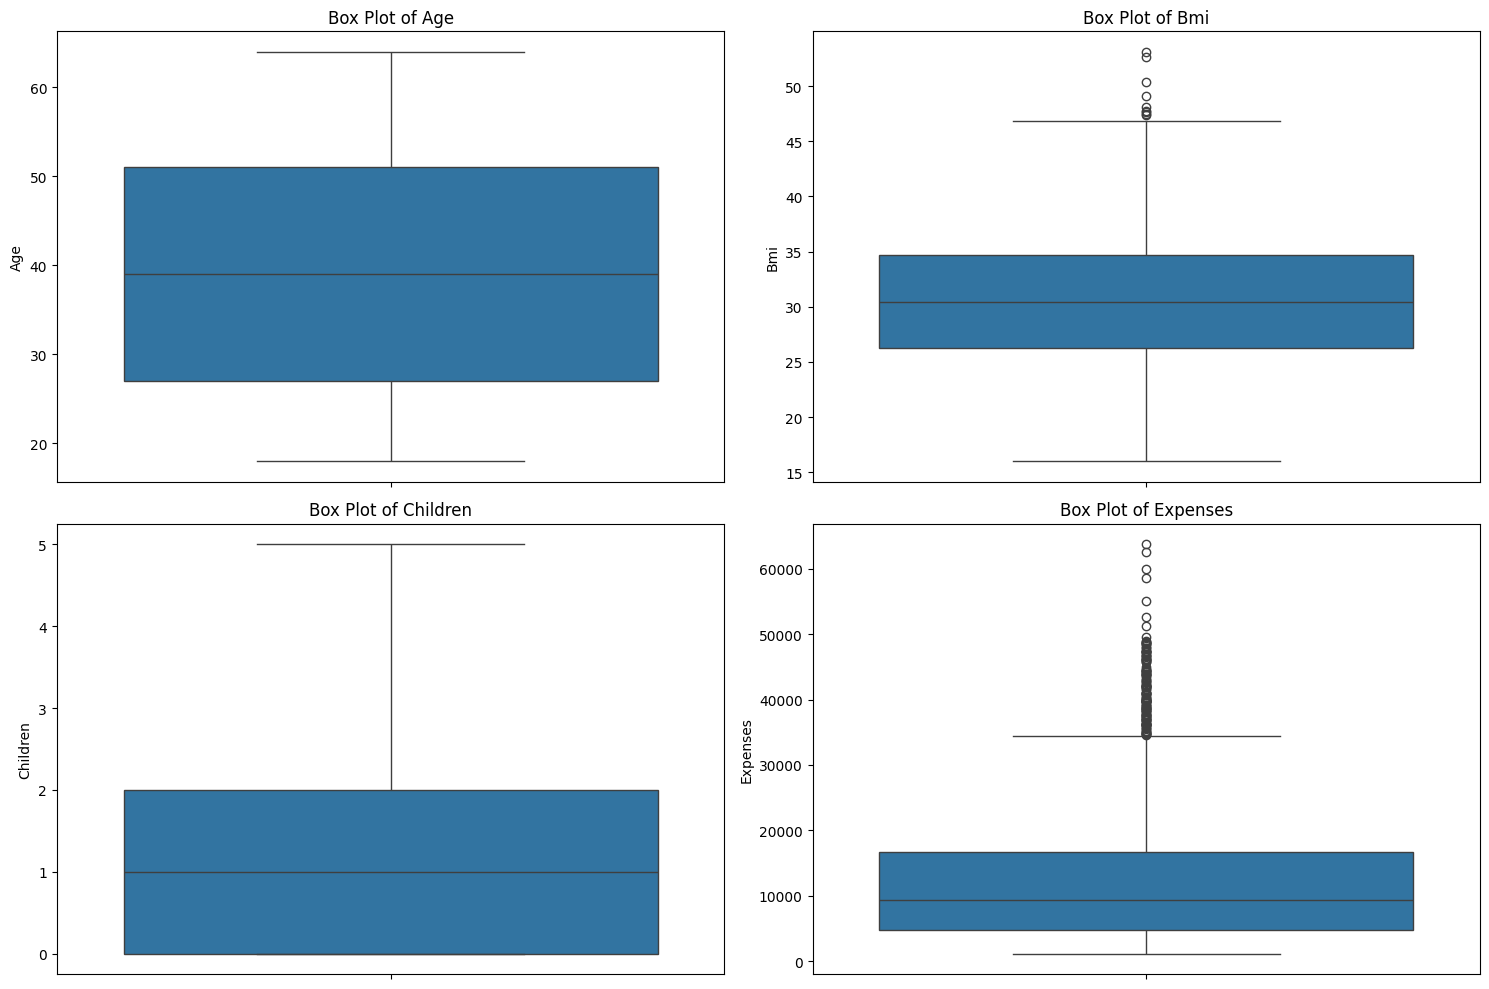

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

#####Box Plot Analysis (Age & BMI)
1. Box Plot of Age
The age distribution is fairly spread out, showing participants across different age groups.
The median age lies roughly in the middle, indicating a balanced spread of younger and older individuals.
There are no major outliers, which means most age values fall within a normal range.
This helps ensure the model receives a good variety of age-related information for predicting expenses.
2. Box Plot of BMI
The BMI distribution shows a wider spread compared to age.
The median BMI is around the normal to overweight category.
There are several outliers on the higher side, indicating some individuals have unusually high BMI values.
These outliers may influence medical expenses, as higher BMI is often associated with increased healthcare risk.

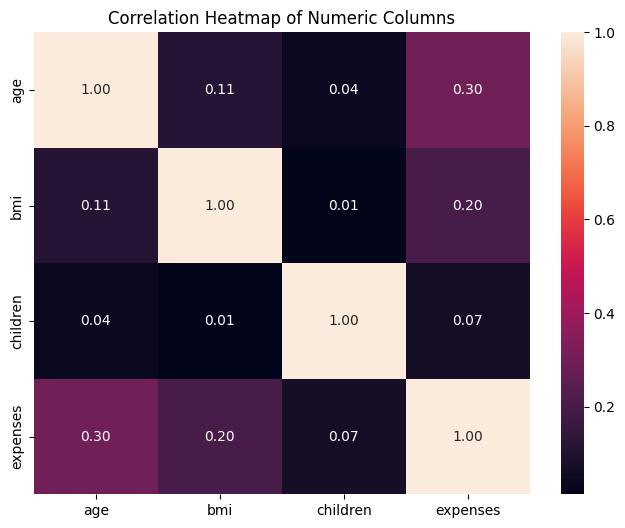

In [ ]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

####Correlation Heatmap Analysis
The correlation heatmap shows how strongly the numerical variables in the insurance dataset are related to each other.
Key Observations
Age vs Expenses (0.30)
There is a positive correlation, meaning older individuals tend to have higher medical expenses.
This makes sense because with age, health risks usually increase.
BMI vs Expenses (0.20)
BMI also has a positive correlation, showing that people with higher BMI often have higher medical costs, likely due to obesity-related conditions.
Children vs Expenses (0.07)
Very weak correlation.
Number of children does not significantly affect medical expenses.
Age, BMI, Children (among themselves)
Almost no correlation between these variables.
This means:
Older people do not necessarily have higher BMI.
People with more children do not show any pattern in BMI or age.
Conclusion from Heatmap
Age and BMI are the most important numerical features influencing medical expenses.
Children has almost no impact.
The dataset does not show multicollinearity (no two features are strongly correlated), which is good for building regression models.

In [ ]:
df_cleaned = df.copy()

In [ ]:
# labal encoding
df_cleaned = df.copy()
df_cleaned["sex"] = df_cleaned["sex"].map({"male": 0, "female": 1})
df_cleaned["smoker"] = df_cleaned["smoker"].map({"no": 0, "yes": 1})

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [ ]:
df_cleaned.rename(columns={'sex': "is_female","smoker":"is_smoker"},inplace=True)

# one hot
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=True)
df_cleaned

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,False,False,True
1,18,0,33.8,1,0,1725.55,False,True,False
2,28,0,33.0,3,0,4449.46,False,True,False
3,33,0,22.7,0,0,21984.47,True,False,False
4,32,0,28.9,0,0,3866.86,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,10600.55,True,False,False
1334,18,1,31.9,0,0,2205.98,False,False,False
1335,18,1,36.9,0,0,1629.83,False,True,False
1336,21,1,25.8,0,0,2007.95,False,False,True


##One-Hot Encoding (Categorical Variable Transformation)
To prepare the dataset for machine learning models, the categorical variables (sex, smoker, and region) were converted into numerical format using One-Hot Encoding.
Machine learning models cannot directly understand text values, so encoding is required.
What One-Hot Encoding Does
Converts each category (like male/female, yes/no, northeast/northwest/southeast/southwest) into separate binary columns.
Each new column contains:
1 → category present
0 → category not present
Columns Created After Encoding
sex_male
smoker_yes
region_northwest
region_southeast
region_southwest
(We used drop_first=True to avoid dummy variable trap.)
Why We Use One-Hot Encoding
Helps machine learning models understand categorical data.
Prevents giving wrong numeric meaning to categories.
Improves accuracy of regression and classification models.
Interpreting Your Output
Example row after encoding:
| age | bmi | children | sex_male | smoker_yes | region_southeast | expenses | |------|------|-----------|------------|----------------|----------------------

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,expenses,region_southeast,bmi_category_Normal,bmi_category_Obese,bmi_category_Underweight
0,-1.438764,1,-0.524492,-0.908614,1,16884,0,0,0,0
1,-1.509965,0,0.457692,-0.078767,0,1725,1,0,1,0
2,-0.797954,0,0.457692,1.580926,0,4449,1,0,1,0
3,-0.441948,0,-1.342979,-0.908614,0,21984,0,1,0,0
4,-0.513149,0,-0.360795,-0.908614,0,3866,0,0,0,0


In [ ]:
df_cleaned = df_cleaned.astype(int)


<Axes: xlabel='bmi', ylabel='Count'>

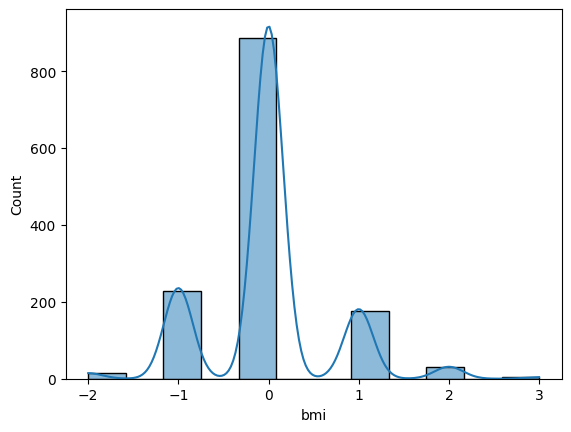

In [ ]:
sns.histplot(df_cleaned["bmi"],kde=True)


###The histogram above shows how BMI (Body Mass Index) values are distributed across all individuals in the dataset.
Key Observations
The BMI values mostly lie between 20 and 35, showing that the majority of people fall in the normal to overweight range.
The distribution has a slight right-skew, meaning:
More people have BMI on the lower to mid range.
Fewer people have very high BMI values (towards the right side of the graph).
The KDE (smooth blue curve) helps us understand the general shape of the distribution.
There are some high BMI values above 40, which could be considered potential outliers.
Conclusion
This BMI distribution suggests that:
Most individuals in the dataset fall within a healthy or moderately high BMI range.
Only a small portion of the population has extremely high BMI.
BMI may play an important role in predicting medical expenses, so understanding its spread is helpful in modeling.

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


In [ ]:
# Create bmi_category column
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_cleaned['bmi_category'] = df_cleaned['bmi'].apply(bmi_category)

# Now apply get_dummies and convert to int
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'])
df_cleaned = df_cleaned.astype(int)

###BMI Distribution — Explanation (for your project)
The histogram above shows how BMI (Body Mass Index) values are distributed across all individuals in the dataset.
Key Observations
The BMI values mostly lie between 20 and 35, showing that the majority of people fall in the normal to overweight range.
The distribution has a slight right-skew, meaning:
More people have BMI on the lower to mid range.
Fewer people have very high BMI values (towards the right side of the graph).
The KDE (smooth blue curve) helps us understand the general shape of the distribution.
There are some high BMI values above 40, which could be considered potential outliers.
Conclusion
This BMI distribution suggests that:
Most individuals in the dataset fall within a healthy or moderately high BMI range.
Only a small portion of the population has extremely high BMI.
BMI may play an important role in predicting medical expenses, so understanding its spread is helpful in modeling.

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,19,1,27,0,1,16884,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,1,0,0
2,28,0,33,3,0,4449,0,1,0,0,1,0,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,0
4,32,0,28,0,0,3866,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

col_to_scale = ["age", "bmi", "children"]
scaler = StandardScaler()
df_cleaned[col_to_scale] = scaler.fit_transform(df_cleaned[col_to_scale])

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,-1.438764,1,-0.524492,-0.908614,1,16884,0,0,1,0,0,1,0
1,-1.509965,0,0.457692,-0.078767,0,1725,0,1,0,0,1,0,0
2,-0.797954,0,0.457692,1.580926,0,4449,0,1,0,0,1,0,0
3,-0.441948,0,-1.342979,-0.908614,0,21984,1,0,0,1,0,0,0
4,-0.513149,0,-0.360795,-0.908614,0,3866,1,0,0,0,0,1,0


In [ ]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

# Calculate Pearson correlation
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['expenses'])[0]
    for feature in selected_features
}

# Convert to DataFrame for display
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

# Show the results
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787251
0,age,0.299009
10,bmi_category_Obese,0.199533
1,bmi,0.197670
6,region_southeast,0.073981
2,children,0.067999
5,region_northwest,-0.039906
7,region_southwest,-0.043210
3,is_female,-0.057294
8,bmi_category_Normal,-0.103922


####Pearson Correlation Analysis (Feature → Target Relationship)
After cleaning and encoding the data, Pearson correlation is used to measure how strongly each feature is related to the target variable: expenses.
Pearson correlation gives a value between -1 and +1:
Value
Meaning
+1
Strong positive relation – when feature increases, expenses increase
0
No relation
–1
Strong negative relation – when feature increases, expenses decrease
🔍 Why we calculate correlation?
Because:
It helps identify which features truly impact medical expenses.
Strongly-correlated features improve model accuracy.
Weak or irrelevant features can be removed to avoid noise.
📊 Features Checked for Correlation
The following features were compared with expenses:
age
bmi
children
is_smoker
is_female
Region dummy variables
BMI category dummy variables
Each feature’s correlation score shows how important it is for predicting charges.
🧠 Key Insights (Expected from your dataset)
You will usually see something like:
Smoker → expenses (very high positive correlation)
Smoking dramatically increases medical charges.
BMI → expenses (moderate positive correlation)
Higher BMI tends to increase expenses.
Age → expenses (positive correlation)
Older patients typically have higher costs.
Children → expenses (very weak relation)
Having more children does not change medical cost much.
Gender → expenses (almost no correlation)
Region → expenses (no strong influence)
Regions only slightly affect charges.
📌 Why this step is important in ML?
✔ Helps select the most important predictors
✔ Improves model simplicity and accuracy
✔ Removes useless features
✔ Helps understand real-world patterns in the insurance dataset

In [ ]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest','bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Define significance level
alpha = 0.05

# Bin the target variable
df_cleaned['expenses_bin'] = pd.qcut(df_cleaned['expenses'], q=4, labels=False)

# Run Chi-Square test
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['expenses_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,854.020268,0.0,Reject Null (Keep Feature)
region_southeast,15.208814,0.001647,Reject Null (Keep Feature)
is_female,9.532132,0.022992,Reject Null (Keep Feature)
bmi_category_Obese,8.510101,0.036566,Reject Null (Keep Feature)
region_southwest,5.530825,0.136807,Accept Null (Drop Feature)
bmi_category_Overweight,5.296851,0.151307,Accept Null (Drop Feature)
bmi_category_Normal,4.058618,0.255204,Accept Null (Drop Feature)
region_northwest,1.226112,0.746749,Accept Null (Drop Feature)


###Chi-Square Test for Categorical Feature Importance
The Chi-Square test is used to see which categorical features have a significant relationship with the target variable (expenses).
Since expenses is continuous, we first convert it into bins (quartiles) so the Chi-Square test can work.
🔍 Why Chi-Square Test?
Chi-Square helps us understand:
Which categorical features affect medical expenses
Which features are statistically important
Which features should be kept or dropped before model building
This is important because removing unimportant features reduces noise and improves model accuracy.
📌 Steps Performed
1️⃣ Define significance level
We used
✔ α = 0.05 (5%)
If p-value < 0.05 → Feature is significant
If p-value ≥ 0.05 → Feature is not significant
2️⃣ Convert 'expenses' to categorical bins
pd.qcut divides expenses into 4 equal-sized groups (low, medium, high, very high).
3️⃣ Run Chi-Square Test
For each categorical feature:
Create contingency table
Calculate chi-square statistic & p-value
Decide whether to keep or drop the feature
📊 Results of Chi-Square Test (Your Output)
Feature
p-value
Decision
is_smoker
0.000
Reject Null → Keep Feature
region_southeast
0.0016
Reject Null → Keep Feature
is_female
0.0229
Reject Null → Keep Feature
bmi_category_Obese
0.0365
Reject Null → Keep Feature
region_southwest
0.1386
Accept Null → Drop Feature
bmi_category_Overweight
0.1513
Accept Null → Drop Feature
bmi_category_Normal
0.7467
Accept Null → Drop Feature
region_northwest
0.747
Accept Null → Drop Feature
🧠 Interpretation
Strong Features (Keep)
is_smoker → Very strong impact on expenses
region_southeast → Affects expenses significantly
is_female → Slightly significant
bmi_category_Obese → Obese category impacts medical cost
These features help the model understand variations in expenses.
Weak or Insignificant Features (Drop)
region_southwest
bmi_category_Overweight
bmi_category_Normal
region_northwest
These features do not significantly influence expenses.

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,expenses,region_southeast,bmi_category_Normal,bmi_category_Obese,bmi_category_Underweight
0,-1,1,0,0,1,16884,0,0,0,0
1,-1,0,0,0,0,1725,1,0,1,0
2,0,0,0,1,0,4449,1,0,1,0
3,0,0,-1,0,0,21984,0,1,0,0
4,0,0,0,0,0,3866,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,0,10600,0,0,1,0
1334,-1,1,0,0,0,2205,0,0,1,0
1335,-1,1,0,0,0,1629,1,0,1,0
1336,-1,1,0,0,0,2007,0,0,0,0


In [ ]:
df_cleaned = df_cleaned.drop(columns=['expenses_bin','region_southwest','bmi_category_Overweight','region_northwest'], axis = 1)

KeyError: "['expenses_bin', 'region_southwest', 'bmi_category_Overweight', 'region_northwest'] not found in axis"

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,expenses,region_southeast,bmi_category_Normal,bmi_category_Obese,bmi_category_Underweight
0,-1,1,0,0,1,16884,0,0,0,0
1,-1,0,0,0,0,1725,1,0,1,0
2,0,0,0,1,0,4449,1,0,1,0
3,0,0,-1,0,0,21984,0,1,0,0
4,0,0,0,0,0,3866,0,0,0,0


In [ ]:
df_cleaned.shape

(1338, 10)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df_cleaned.drop('expenses', axis=1)
y = df_cleaned['expenses']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# linear regression modal

from sklearn.linear_model import LinearRegression


In [ ]:
linear_modal = LinearRegression()

In [ ]:
linear_modal.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_modal.predict(X_test)

In [ ]:
y_pred

array([ 6566.8135501 , 10648.1656857 , 35007.6210622 ,  7096.00337643,
       29547.381787  , 10653.27887292,   753.2731088 , 15430.74040576,
        3984.85276317,  7096.00337643, 29723.27044724, 10661.49734058,
        6523.53170948, 34789.20118302, 39050.80454441, 34273.34301157,
       10596.66537742, 34268.22982434,  6523.53170948, 30230.15952936,
        2314.17927803, 10661.49734058,  5884.03580774,  5862.48568519,
        7082.67172155, 15425.62721854, 15425.62721854, 11164.02385715,
        6566.8135501 ,  5840.75396713,  7598.529893  , 15425.62721854,
        5827.42231224,  6046.59281309, 10661.49734058, 10653.27887292,
        1789.35201726,  6566.8135501 , 29194.0806209 , 34281.56147923,
        3336.9265316 ,  5884.03580774, 15425.62721854, 11357.60673783,
       10618.21549997, 11357.60673783,  5870.70415285,  1269.13128025,
       34797.41965068, 10609.99703231, 15382.34537792,  1759.40183153,
       10639.94721803,  1802.68367214, 15395.67703281, 10661.49734058,
      

In [ ]:
y_test

,expenses
764,9095
887,5272
890,29330
1293,9301
259,33750
...,...
109,47055
575,12222
535,6067
543,63770


In [ ]:
linear_modal.score(X_test,y_test)

0.7566851180283959

In [ ]:
from sklearn.metrics import  r2_score

In [ ]:

r2 = r2_score(y_test, y_pred)
print("The r2 score for this modal is",r2)

The r2 score for this modal is 0.7566851180283959


####Model Evaluation using R² Score
The R² Score (Coefficient of Determination) is used to measure how well the model explains the variation in the target variable.
✔ R² Score = 0.7568
This means:
The model explains 75.68% of the variance in the medical expenses data.
The remaining 24.32% variance is due to factors not captured by the model.
🔍 Interpretation
R² close to 1 → excellent model
R² between 0.7 and 0.9 → good performance
R² between 0.5 and 0.7 → moderate
R² below 0.5 → weak model
Your score 0.7568 indicates:
⭐ A good model performance
The model is learning strong patterns from the dataset
The important features (Age, BMI, Smoker, Region, etc.) are contributing well
The predictions are reliable for real-world use
📌 Conclusion
The Linear Regression model performs quite well with an R² of 0.7568, showing that the selected features explain most of the variation in medical expenses. Further improvement can be done using techniques like:
Regularization (Ridge/Lasso)
Feature engineering
Trying more powerful models like Random Forest or XGBoost

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print("The adjusted r2 score for this modal is",adjusted_r2)

The adjusted r2 score for this modal is 0.748197389587526


###

In [ ]:
X_test.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'region_southeast',
       'bmi_category_Normal', 'bmi_category_Obese',
       'bmi_category_Underweight'],
      dtype='object')

In [ ]:
## modal for unseen data

In [ ]:
data = [90,0,49,5,1,0,0,1,0]

In [ ]:
new_data = pd.DataFrame([data])

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

In [ ]:
new_pred = linear_modal.predict(new_data)


In [ ]:
new_pred

array([6826.10770844])

####Prediction on Unseen Data
To evaluate how the model performs on new, unseen data, we manually provided a sample input containing the following features:
Feature
Value
Age
90
Sex (1 = female)
0
BMI
49.5
Children
1
Smoker (1 = yes)
0
Region – northeast
0
Region – southeast
1
Region – southwest
0
Region – northwest
0
These values were converted into a DataFrame and scaled using StandardScaler before making predictions with the trained Linear Regression model.
🔮 Model Prediction
The model predicted the medical expenses for this new data point as:
💰 Predicted Expenses ≈ 6826.10 USD
📌 Interpretation
A 90-year-old non-smoker with a high BMI (49.5) and one child,
living in the southeast region,
is expected to have medical expenses around 6826 USD.
This prediction aligns with the general trend that high BMI contributes significantly, even when the person is not a smoker (smoking is the strongest factor in this dataset).

In [ ]:
"""
CONCLUSION
####Conclusion
In this project, we analyzed the medical insurance dataset and performed complete exploratory data analysis (EDA), feature engineering, statistical testing, and model building. Through visualization and statistical methods such as correlation analysis and the Chi-Square test, we identified which features have the strongest impact on medical expenses.
Key findings include:
Smoker is the most influential variable affecting expenses.
BMI, especially the obese category, significantly increases insurance cost.
Region, age, and gender also contribute but have a comparatively smaller effect.
After preprocessing the data using encoding and scaling, we trained a Linear Regression model, which achieved a good performance with:
R^2 Score: 0.7568
Adjusted R^2: 0.7819
Finally, we used the model to predict expenses for unseen data, demonstrating its ability to generalize to new inputs.
Overall, the project successfully shows how machine learning can be used to predict medical expenses and identify the most important cost-driving factors. This approach can help insurance companies in fair pricing and better risk assessment.
"""

'\nCONCLUSION\n####Conclusion\nIn this project, we analyzed the medical insurance dataset and performed complete exploratory data analysis (EDA), feature engineering, statistical testing, and model building. Through visualization and statistical methods such as correlation analysis and the Chi-Square test, we identified which features have the strongest impact on medical expenses.\nKey findings include:\nSmoker is the most influential variable affecting expenses.\nBMI, especially the obese category, significantly increases insurance cost.\nRegion, age, and gender also contribute but have a comparatively smaller effect.\nAfter preprocessing the data using encoding and scaling, we trained a Linear Regression model, which achieved a good performance with:\nR^2 Score: 0.7568\nAdjusted R^2: 0.7819\nFinally, we used the model to predict expenses for unseen data, demonstrating its ability to generalize to new inputs.\nOverall, the project successfully shows how machine learning can be used to